<a href="https://colab.research.google.com/github/mohib121999/Motus-game/blob/main/Neurel_network_for_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dropout,Dense

In [4]:
#@title Titre par défaut
df=pd.read_csv('/content/airline-passengers.csv')# read our data base 
df.head() #df.head return the 5 first rows

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
df.tail() #return the 5 last rows

,Month,Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [6]:
df.shape
(144, 2)

(144, 2)

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


step 1 
busniss& Data understanding

tow type of variable :

  Month (independed)-->144 element Dtype object

  Passenger-->144 elements Dtype int64

all row value existe 

df.head return the 5 first rows

df.tail  return the 5 last rows



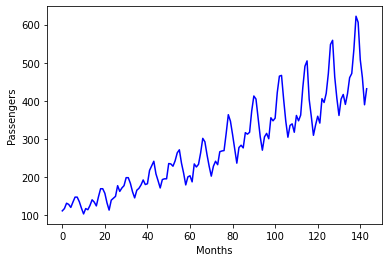

In [8]:
plt.xlabel("Months")
plt.ylabel("Passengers")
plt.plot(df['Passengers'], color='blue')
plt.show()

In [9]:
training_size = int(len(df['Passengers'])*0.8)
training_size
115 

115

In [10]:
def load_data(data, seq_len):
  x = []
  y = []
  for i in range(seq_len, len(data)):
     x.append(data.iloc[i-seq_len : i, 1])
     y.append(data.iloc[i,1])
  return x,y

In [11]:
x, y = load_data(df, 20)

In [12]:
len(y)


124

In [13]:
x_train = x[:training_size]
y_train = y[:training_size]
x_test = x[training_size:]
y_test = y[training_size:]

In [14]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [15]:
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ',y_test.shape)
 

x_train.shape =  (115, 20)
y_train.shape =  (115,)
x_test.shape =  (9, 20)
y_test.shape =  (9,)


In [16]:
print(type(x_test))

<class 'numpy.ndarray'>


In [17]:
print(type(x_train))

<class 'numpy.ndarray'>


In [18]:
x_train = np.reshape(x_train, (training_size, 20, 1))
x_test = np.reshape(x_test, (x_test.shape[0], 20, 1))

In [19]:
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (115, 20, 1)
y_train.shape =  (115,)
x_test.shape =  (9, 20, 1)
y_test.shape =  (9,)


In [20]:
model = Sequential()
model.add(Dense(40, input_shape=(20,),activation='relu'))#relu non linear fonction
model.add(Dense(40,activation='relu'))
model.add(Dense(1)) 
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=500, batch_size=2, verbose=2)# verbose to help the model to train in the case of wieth ~~0 

Epoch 1/500
58/58 - 3s - loss: 22624.7344 - 3s/epoch - 44ms/step
Epoch 2/500
58/58 - 0s - loss: 3529.3335 - 119ms/epoch - 2ms/step
Epoch 3/500
58/58 - 0s - loss: 2491.0820 - 118ms/epoch - 2ms/step
Epoch 4/500
58/58 - 0s - loss: 1899.0493 - 120ms/epoch - 2ms/step
Epoch 5/500
58/58 - 0s - loss: 1858.9788 - 128ms/epoch - 2ms/step
Epoch 6/500
58/58 - 0s - loss: 1158.5219 - 123ms/epoch - 2ms/step
Epoch 7/500
58/58 - 0s - loss: 1147.5878 - 125ms/epoch - 2ms/step
Epoch 8/500
58/58 - 0s - loss: 969.8829 - 129ms/epoch - 2ms/step
Epoch 9/500
58/58 - 0s - loss: 1042.7640 - 114ms/epoch - 2ms/step
Epoch 10/500
58/58 - 0s - loss: 769.5010 - 126ms/epoch - 2ms/step
Epoch 11/500
58/58 - 0s - loss: 763.9058 - 119ms/epoch - 2ms/step
Epoch 12/500
58/58 - 0s - loss: 696.5140 - 119ms/epoch - 2ms/step
Epoch 13/500
58/58 - 0s - loss: 587.2560 - 122ms/epoch - 2ms/step
Epoch 14/500
58/58 - 0s - loss: 544.0128 - 119ms/epoch - 2ms/step
Epoch 15/500
58/58 - 0s - loss: 616.6285 - 128ms/epoch - 2ms/step
Epoch 16/500

In [21]:
y_pred=model.predict(x_test)

1/1 [==============================] - 0s 67ms/step


In [22]:
y_pred

array([[420.3398 ],
       [455.7296 ],
       [542.3683 ],
       [619.1246 ],
       [634.3969 ],
       [509.05765],
       [442.9419 ],
       [401.82812],
       [426.25504]], dtype=float32)

In [23]:
y_test

array([461, 472, 535, 622, 606, 508, 461, 390, 432])

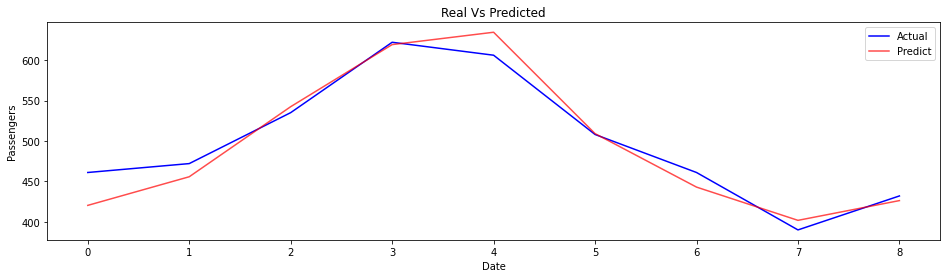

In [24]:
plt.figure(figsize=(16,4))
plt.plot(y_test, color='blue',label='Actual')
plt.plot(y_pred, alpha=0.7, color='red',label='Predict')
plt.title('Real Vs Predicted')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()